# KMedoids 


In [6]:
import pandas as pd
import numpy as np
from sklearn_extra.cluster import KMedoids 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv('data/embedding_df.csv')
X = X.iloc[:,:-1]

pca = PCA(n_components=0.80)  # Selecciona componentes que expliquen el 80% de la varianza
X_pca = pca.fit_transform(X)

In [7]:
# Mostramos la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_.cumsum()
print(f'Varianza explicada acumulada: {explained_variance}')

Varianza explicada acumulada: [0.1811817  0.35416178 0.45863641 0.54580984 0.62152322 0.67652213
 0.72415693 0.76549633 0.8058957 ]


In [9]:
from sklearn.metrics import silhouette_score
Y = {}
varianza_intra_cluster = []
silhouettes = []
for k in range (1, 30): # Evaluamos entre 1 a 30 clusters posibles
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init=10).fit(X)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(X_pca, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Y[k] = kmeans.labels_

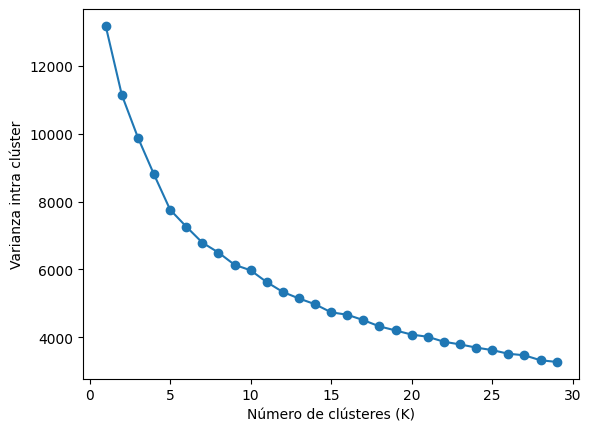

In [12]:
plt.plot(range(1, 30), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

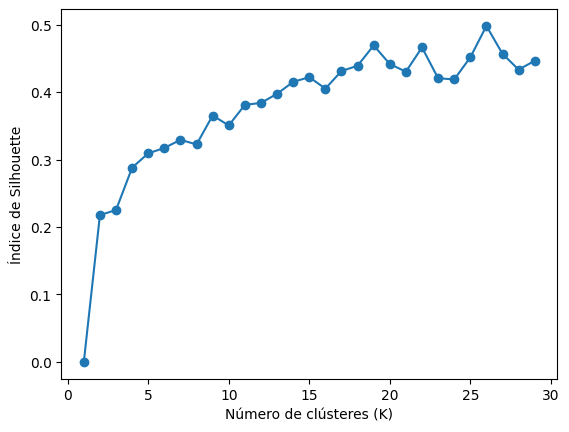

In [13]:
plt.plot(range(1, 30), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

In [14]:
np.argmax(silhouettes)

25

In [3]:
from sklearn_extra.cluster import KMedoids 

Kmedoides = KMedoids(n_clusters = 26, metric = 'euclidean', random_state = 321).fit(X_pca)
Kmedoides.medoid_indices_

C:\Users\DELL\AppData\Local\Programs\Python\Python37\venvs\semana3_ANS_MIAD\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:333: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\venvs\semana3_ANS_MIAD\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:333: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\venvs\semana3_ANS_MIAD\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:333: UserWarning: Cluster 13 is empty! self.labels_[self.medoid_indices_[13]] may not be labeled with its corresponding cluster (13).
  "its corresponding cluster ({k}).".format(k=k)
C:\Users\DELL\AppData\Local\Programs\Python\Python37\venvs\semana3_

array([ 1904,   641,  1338,   808,  2160,   248,    94,   658,   570,
         429,   349,   281, 31542,  1006,   794,   264,   939,  5244,
        9890,  7030,  2877,   122, 50635, 10686,  1014,   352],
      dtype=int64)

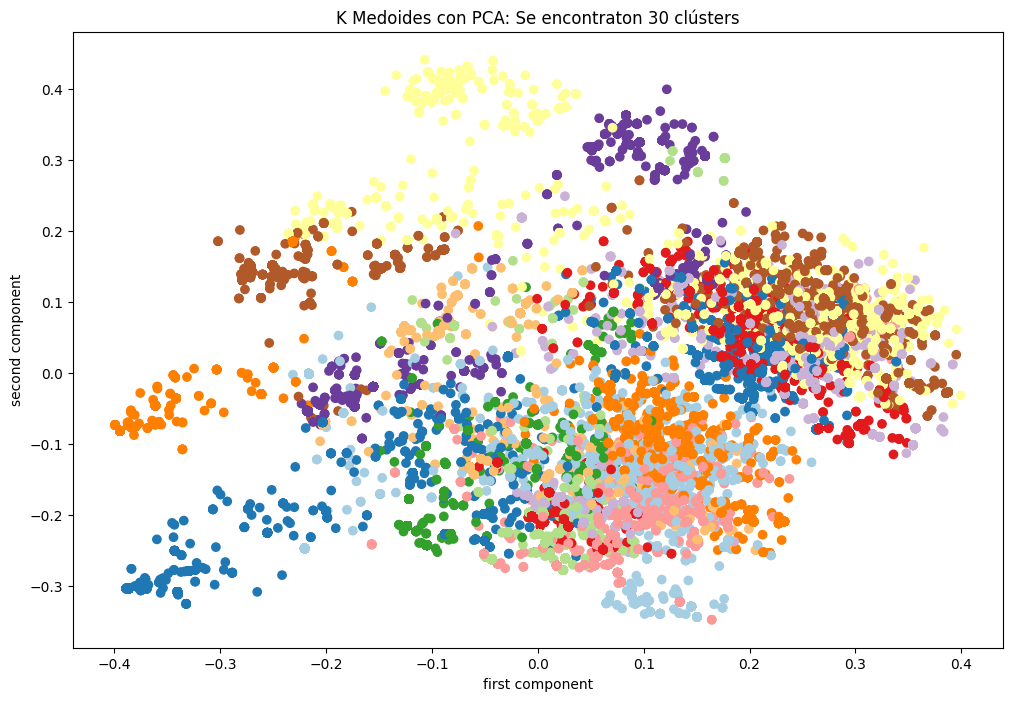

In [19]:
digitos_plot = pd.DataFrame({"X": X_pca[:, 0], "Y": X_pca[:, 1], "Clúster": Kmedoides.labels_.astype(int)}).reset_index(drop = True)
y_pred = Kmedoides.labels_.astype(int)
color = [sns.color_palette("Paired", 26)[k] for k in y_pred]

fig, ax = plt.subplots(figsize = (12, 8), dpi = 100)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c = color)
# for i, txt in enumerate(digitos_plot["Clúster"]):
#        plt.text(digitos_plot["X"][i], digitos_plot["Y"][i], 
#                 digitos_plot["Clúster"][i], fontsize = 7)
plt.title('K Medoides con PCA: Se encontraton 30 clústers')
plt.xlabel('first component')
plt.ylabel('second component')
plt.show()

In [4]:
df = pd.read_csv('data/datos.csv')

C:\Users\DELL\AppData\Local\Programs\Python\Python37\venvs\semana3_ANS_MIAD\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (32,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
df['Cluster'] = Kmedoides.labels_

In [20]:
df_group = df.groupby('Cluster').agg({
    'GRD_NOMBRE': lambda x: x.value_counts().index[0],
    'GRD_NIVEL_ESCOLAR': lambda x: x.value_counts().index[0],
    'D_SEXO': lambda x: x.value_counts().index[0],
    'CIU_NOMBRE': lambda x: x.value_counts().index[0],
    'LOC_NOMBRE': lambda x: x.value_counts().index[0],
    'DIT_NOMBRE': lambda x:  x.value_counts().index[0] if len(x.value_counts()) > 1 else x.value_counts().index[0],
    'TAE_NOMBRE': lambda x:  x.value_counts().index[0] if len(x.value_counts()) > 1 else x.value_counts().index[0],
    'ETN_NOMBRE': lambda x:  x.value_counts().index[0] if len(x.value_counts()) > 1 else x.value_counts().index[0],
    'INR_ES_VICTIMA': lambda x: x.value_counts().index[0],
    'EDAD_INR': 'mean',
    'Decil ICFES': lambda x: x.value_counts().index[0],
    'Ranking ICFES':'mean'
}).reset_index()
df_group
# Mostrar el resultado agrupado
df_group=pd.DataFrame(df_group)
df_group.head(60)

,Cluster,GRD_NOMBRE,GRD_NIVEL_ESCOLAR,D_SEXO,CIU_NOMBRE,LOC_NOMBRE,DIT_NOMBRE,TAE_NOMBRE,ETN_NOMBRE,INR_ES_VICTIMA,EDAD_INR,Decil ICFES,Ranking ICFES
0,0,SEPTIMO,BASICA SECUNDARIA,F,BOGOTÁ D.C.,KENNEDY,NO APLICA,NO APLICA,NO APLICA,0,12.000000,4th Decile,503.671724
1,1,JARDIN,PREESCOLAR,F,BOGOTÁ D.C.,BOSA,NO APLICA,NO APLICA,NO APLICA,0,3.000000,10th Decile,451.239892
2,2,CUARTO,BASICA PRIMARIA,F,BOGOTÁ D.C.,KENNEDY,NO APLICA,NO APLICA,NO APLICA,0,8.830713,7th Decile,464.175786
3,3,PRIMERO,BASICA PRIMARIA,F,BOGOTÁ D.C.,KENNEDY,NO APLICA,NO APLICA,NO APLICA,0,6.051852,6th Decile,455.532462
4,4,SEGUNDO,BASICA PRIMARIA,F,BOGOTÁ D.C.,KENNEDY,NO APLICA,NO APLICA,NO APLICA,0,9.496604,1st Decile,498.188679
5,5,NOVENO,BASICA SECUNDARIA,F,BOGOTÁ D.C.,KENNEDY,NO APLICA,NO APLICA,NO APLICA,0,13.906736,5th Decile,500.085780
6,6,TRANSICIÓN (GRADO 0),PREESCOLAR,F,BOGOTÁ D.C.,BOSA,NO APLICA,NO APLICA,NO APLICA,0,5.052696,10th Decile,436.496193
7,7,JARDIN,PREESCOLAR,F,BOGOTÁ D.C.,BOSA,NO APLICA,NO APLICA,NO APLICA,0,4.000000,10th Decile,452.697677
8,8,NOVENO,BASICA SECUNDARIA,F,BOGOTÁ D.C.,KENNEDY,NO APLICA,NO APLICA,NO APLICA,0,13.824008,5th Decile,503.353001
9,9,JARDIN,PREESCOLAR,M,BOGOTÁ D.C.,BOSA,NO APLICA,NO APLICA,NO APLICA,0,3.088732,10th Decile,452.388693
